# Titanic Dataset: LightGBM vs XGBoost

## Objective
The objective of this assignment is to compare the performance of LightGBM and XGBoost algorithms using the Titanic dataset.

## Exploratory Data Analysis (EDA)

### 1. Load the Titanic dataset using Python's pandas library.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')
print('Titanic Train Data')
display(train_data.head())
print('Titanic Test Data')
display(test_data.head())

Titanic Train Data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Titanic Test Data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- From `Test Data` we can observe that `Survived` column is not present i.e `target` variable in this dataset.
- So for further model building , testing and evaluating purpose we can only use `Train` data .

### 2. Check for missing values.

In [2]:
# Droping PassengerId column from both Train and Test dataset
train_data.drop(columns='PassengerId', inplace= True)

# Check for missing values
missing_values_train = train_data.isnull().sum()
missing_values_test = test_data.isnull().sum()
print('Missing Values in Titanic Train Dataset')
display(missing_values_train)

Missing Values in Titanic Train Dataset


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Insight:

**Missing Values in Titanic Train Dataset**
- The `Age` column has 177 missing values.
- The `Cabin` column has 687 missing values.
- The `Embarked` column has 2 missing values.

### 3. Explore data distributions using histograms and box plots.

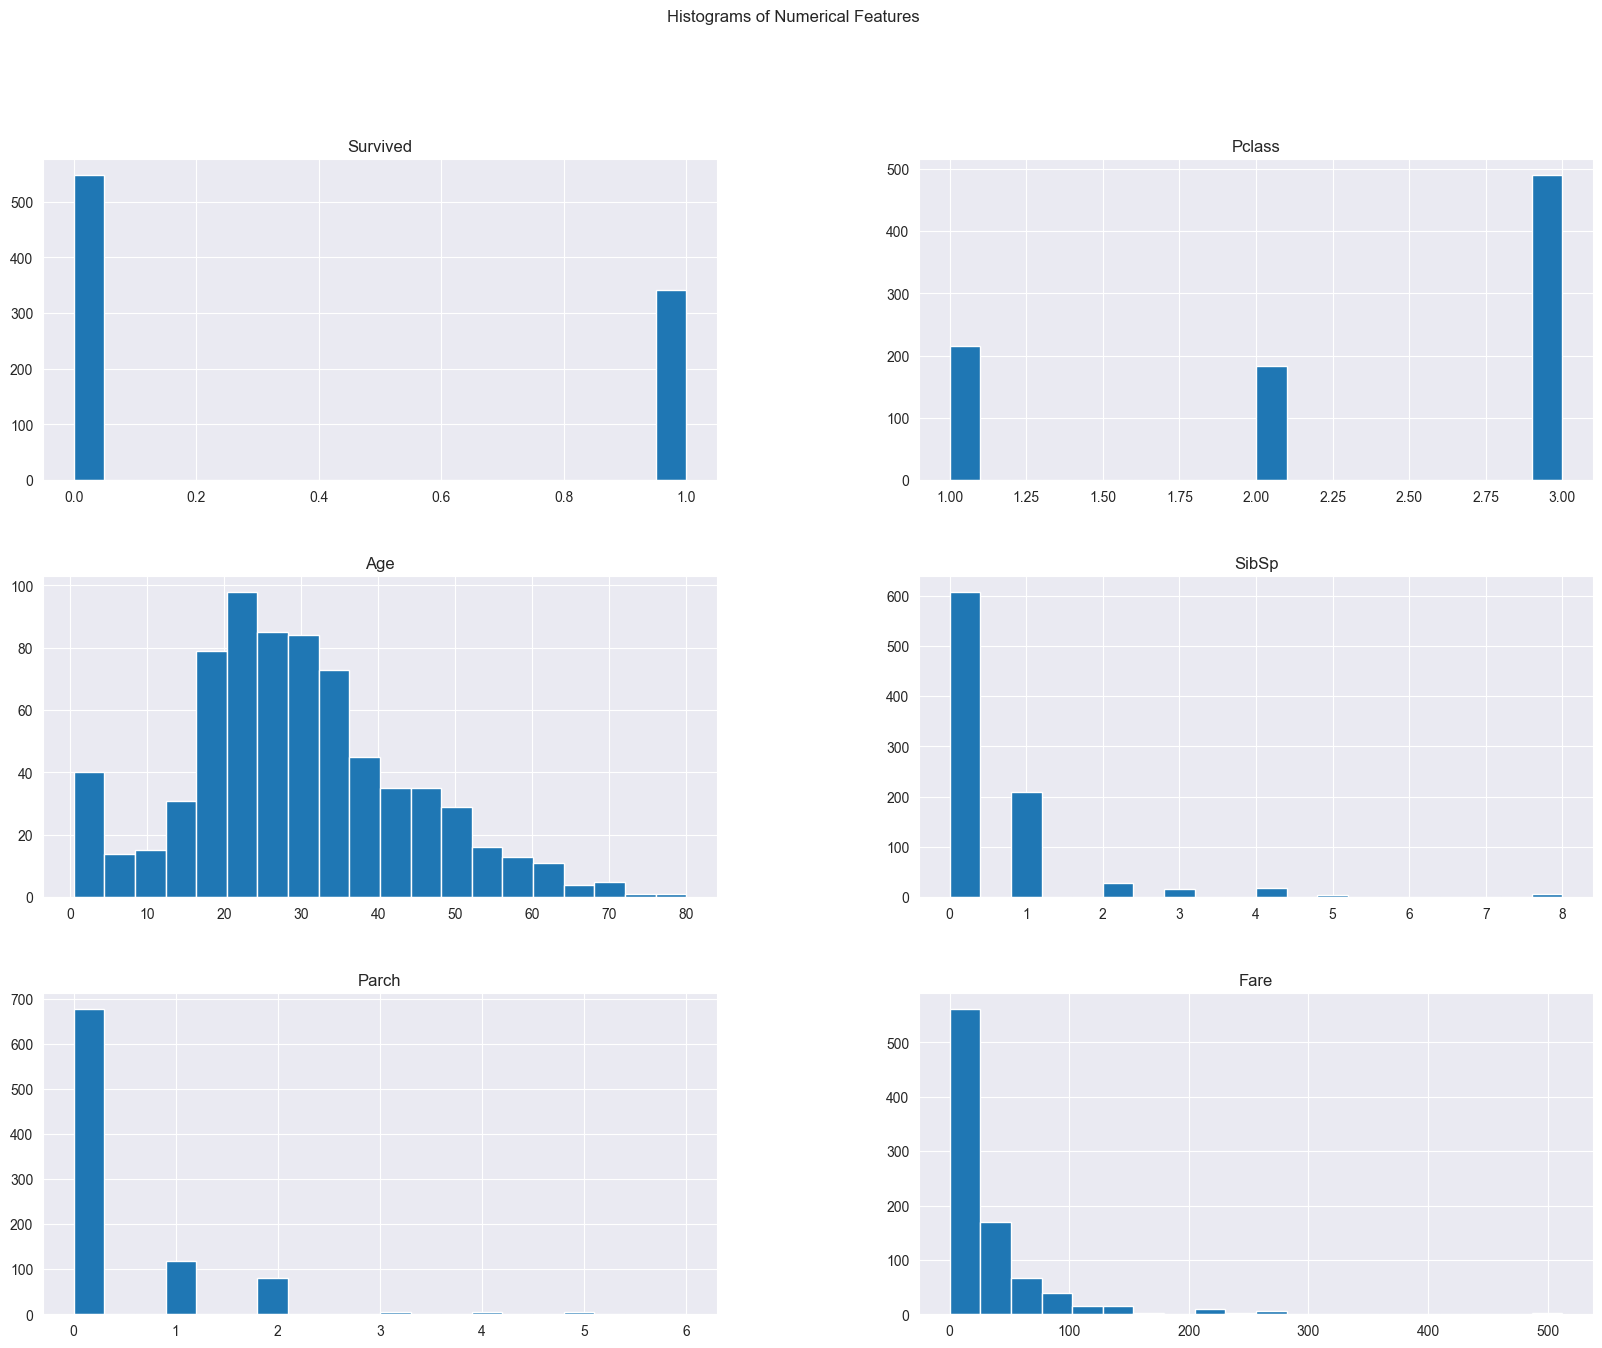

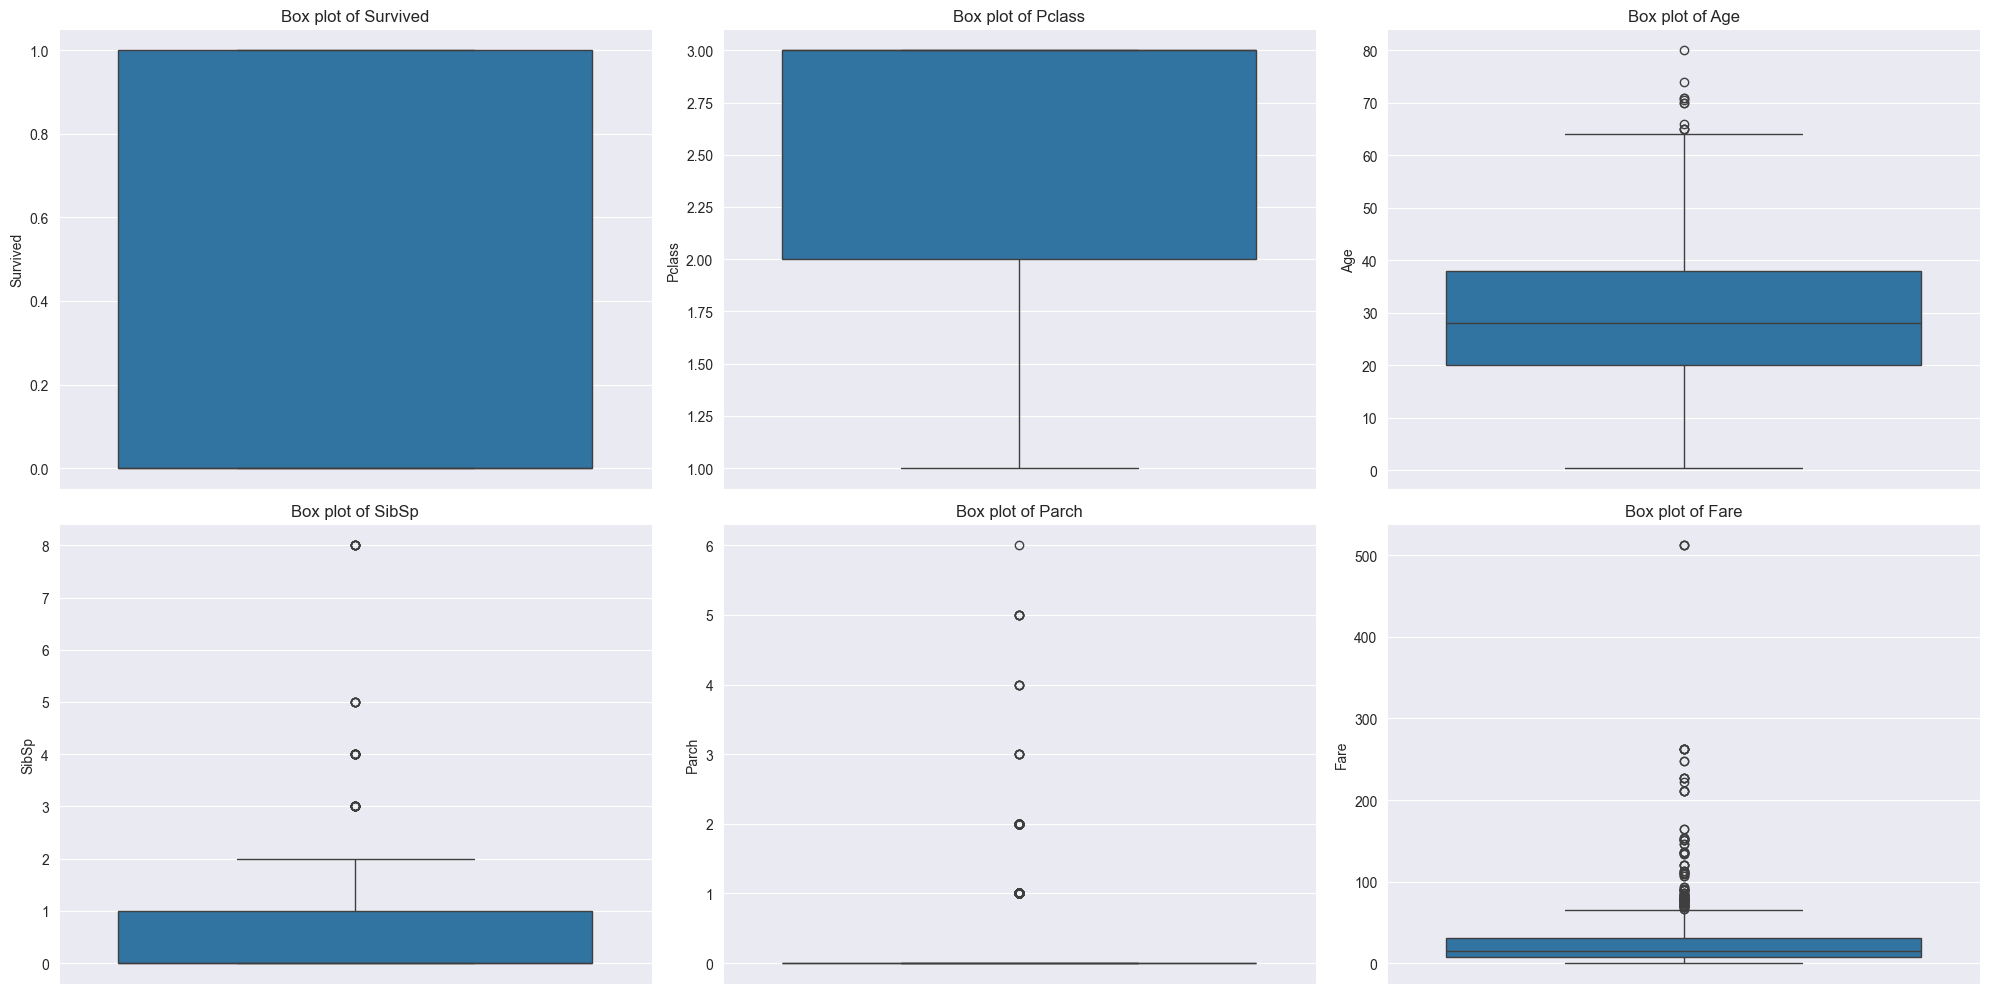

In [5]:
# Plot histograms for numerical features
train_data.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Plot box plots for numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(train_data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=column, data=train_data)
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

#### Histogram Insights:
1. **Survived**: 
   - The binary nature of the target variable is evident, with significantly more passengers not surviving (0) than surviving (1).
   
2. **Pclass**:
   - Most passengers belong to 3rd class, followed by 1st class. Fewest passengers are in 2nd class.

3. **Age**:
   - The distribution is right-skewed, with a large concentration of passengers between the ages of 20 and 40. The majority are young adults, with fewer elderly and children.

4. **SibSp** (Number of Siblings/Spouses aboard):
   - Most passengers have 0 to 1 siblings/spouses aboard. A few outliers with higher values suggest large families.

5. **Parch** (Number of Parents/Children aboard):
   - The majority of passengers do not have any parents/children aboard. A few passengers have larger families, but the occurrence is rare.

6. **Fare**:
   - The distribution of fare is highly right-skewed, with most fares concentrated in the lower range. Some passengers paid extraordinarily high fares.

#### Box Plot Insights:
1. **Survived**: 
   - No variation in the box plot since the variable is binary.

2. **Pclass**:
   - The spread shows 3rd class has the highest count, while the 1st class has fewer passengers.

3. **Age**:
   - The median age is around 30. There are several outliers, with ages exceeding 60.

4. **SibSp**:
   - The majority of passengers had no or 1 sibling/spouse, with outliers having as many as 5 or more.

5. **Parch**:
   - Similar to SibSp, most had no parents/children aboard. A few outliers had more than 3.

6. **Fare**:
   - A substantial number of outliers are present, with the majority of fares concentrated at lower values. A few passengers paid significantly more than the average.

These visualizations highlight key trends and distribution characteristics, such as right-skewed data for features like **Age** and **Fare**, and the presence of outliers in **SibSp**, **Parch**, and **Fare**.

### 4. Visualize relationships between features and survival using scatter plots and bar plots.

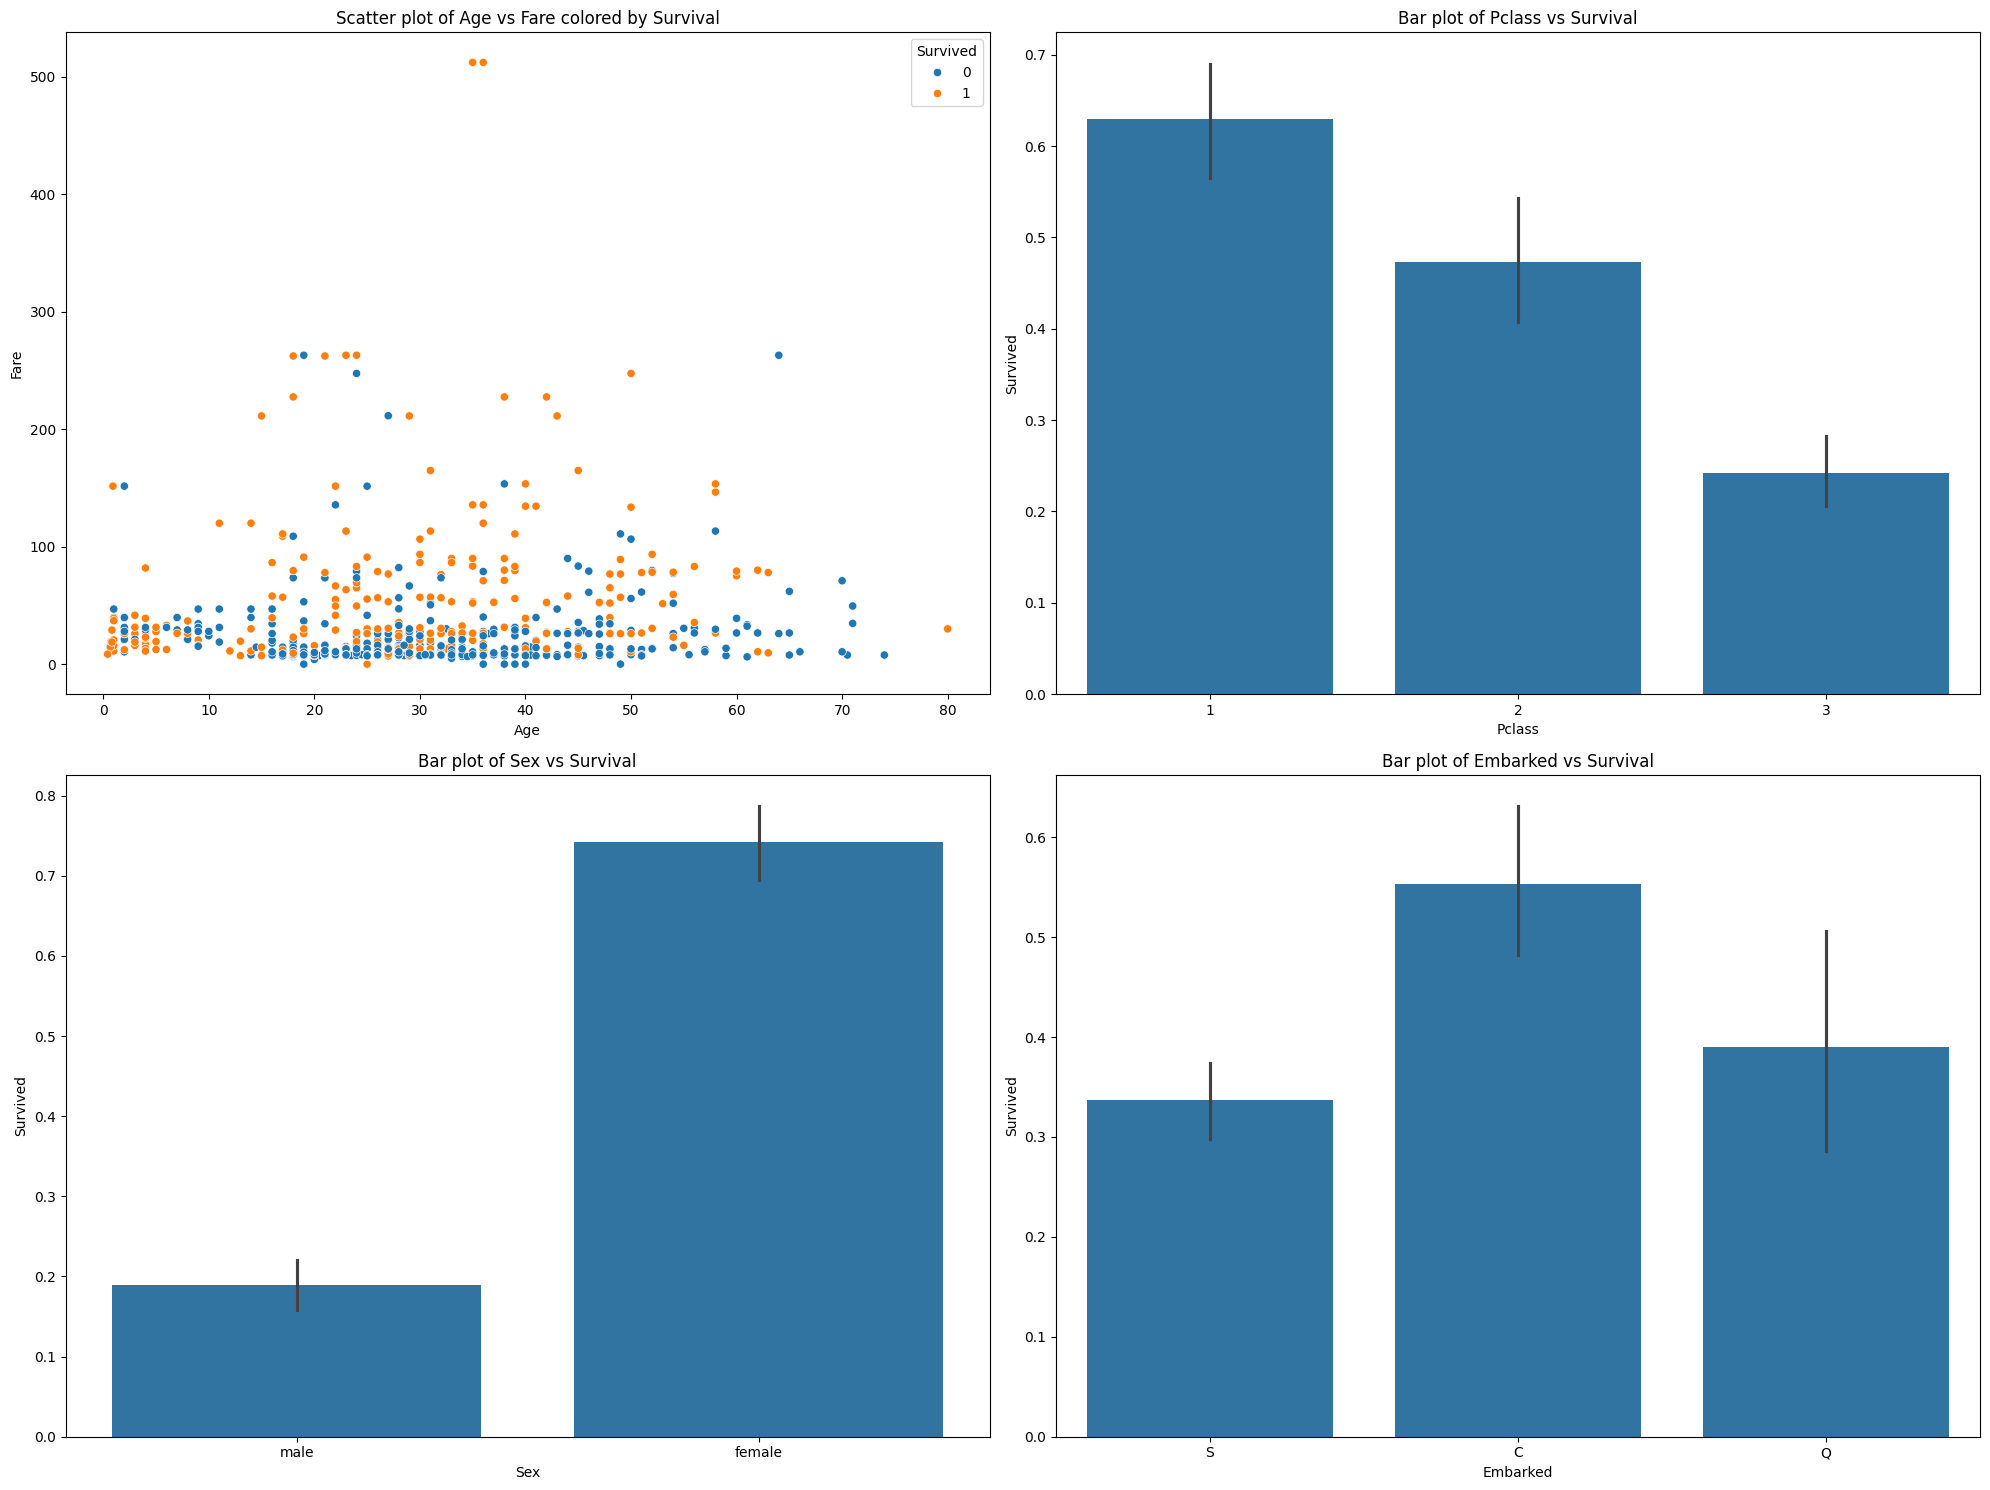

In [25]:
# Visualize relationships between features and survival using scatter plots and bar plots
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Scatter plot of Age vs Fare colored by Survival')

plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Bar plot of Pclass vs Survival')

plt.subplot(2, 2, 3)
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Bar plot of Sex vs Survival')

plt.subplot(2, 2, 4)
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Bar plot of Embarked vs Survival')

plt.tight_layout()
plt.show()

#### Scatter Plot Insights:
- **Age vs Fare colored by Survival**:
   - The scatter plot shows no clear correlation between **Age** and **Fare**.
   - However, survivors (orange points) appear more concentrated in the younger age groups, while non-survivors (blue points) are spread more evenly across age ranges.
   - Higher fares tend to be associated with survivors, though the majority of passengers paid lower fares regardless of survival status.

#### Bar Plot Insights:
1. **Pclass vs Survival**:
   - Passengers in **1st class** had the highest survival rate, followed by **2nd class**, and **3rd class** had the lowest survival rate.
   - This indicates a clear correlation between passenger class and survival, where higher classes had better chances of survival.

2. **Sex vs Survival**:
   - **Females** had a significantly higher survival rate than **males**. This suggests that women were more likely to survive, potentially reflecting the "women and children first" policy.

3. **Embarked vs Survival**:
   - Passengers who embarked from port **C (Cherbourg)** had the highest survival rate, followed by those from **Q (Queenstown)** and **S (Southampton)** with the lowest survival rate.
   - This could indicate differences in survival rates based on embarkation point, possibly tied to class distribution or other factors.

#### Overall Insights:
- **Gender and Class** play critical roles in survival, with females and higher-class passengers having a better chance of survival.
- **Embarked** location might also impact survival chances, with passengers from Cherbourg faring better.
- While **Fare** seems to play a role (higher fares may suggest better chances of survival), the scatter plot indicates that many passengers in lower fare brackets also survived, suggesting that other factors (like class or gender) play a larger role. 

## Data Preprocessing

### 1. Impute missing values.

In [26]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer_age = SimpleImputer(strategy='median')
train_data['Age'] = imputer_age.fit_transform(train_data[['Age']])
imputer_embarked = SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = imputer_embarked.fit_transform(train_data[['Embarked']]).ravel()

# Drop the 'Cabin' column due to a high number of missing values
train_data.drop(columns=['Cabin'], inplace=True)

### 2. Encode categorical variables using one-hot encoding or label encoding.

In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
embarked_encoded = label_encoder.fit_transform(train_data['Sex'])
train_data['Sex'] = embarked_encoded

label_encoder = LabelEncoder()
embarked_encoded = label_encoder.fit_transform(train_data['Embarked'])
train_data['Embarked'] = embarked_encoded

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [38]:
from sklearn.preprocessing import StandardScaler

# Preprocess the data
scaler = StandardScaler()
train_data[['Age','Fare']] = scaler.fit_transform(train_data[['Age','Fare']])
train_data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,0
2,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,2
4,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,2


### Insight:
- Missing values in the `Age` and `Embarked` columns have been imputed.
- The `Cabin` column has been dropped due to a high number of missing values.
- Categorical variables (`Sex` and `Embarked`) have been encoded.

## Building Predictive Models

### 1. Split the preprocessed dataset into training and testing sets.

In [39]:
from sklearn.model_selection import train_test_split

# Split the preprocessed dataset into training and testing sets
X = train_data.drop(columns=['Survived', 'Name', 'Ticket'])
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the preprocessed training data
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,1.240235,0,0,-0.074583,2
733,2,1,-0.488887,0,0,-0.386671,2
382,3,1,0.202762,0,0,-0.488854,2
704,3,1,-0.258337,1,0,-0.490280,2
813,3,0,-1.795334,4,2,-0.018709,2


### 2. Building, Training, and Testing LGBM and XGBM models

In [43]:
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# Initialize LightGBM and XGBoost models
lgb_model = lgb.LGBMClassifier()
xgb_model = xgb.XGBClassifier()

# Train the LightGBM model
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### 3. Evaluating and Crossvalidating Models Performance

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Evaluate the models
lgb_accuracy = accuracy_score(y_test, lgb_predictions)
lgb_precision = precision_score(y_test, lgb_predictions)
lgb_recall = recall_score(y_test, lgb_predictions)
lgb_f1 = f1_score(y_test, lgb_predictions)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)


# Cross-validation scores
lgb_cv_scores = cross_val_score(lgb_model, X, y, cv=5)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5)

# Display the evaluation metrics
metrics = {
    'LightGBM': {
        'Accuracy': lgb_accuracy,
        'Precision': lgb_precision,
        'Recall': lgb_recall,
        'F1 Score': lgb_f1,
        'Cross-Validation Scores': lgb_cv_scores
    },
    'XGBoost': {
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1 Score': xgb_f1,
        'Cross-Validation Scores': xgb_cv_scores
    }
}
metrics

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


{'LightGBM': {'Accuracy': 0.8212290502793296,
  'Precision': np.float64(0.7837837837837838),
  'Recall': np.float64(0.7837837837837838),
  'F1 Score': np.float64(0.7837837837837838),
  'Cross-Validation Scores': array([0.79888268, 0.82022472, 0.85955056, 0.79775281, 0.85393258])},
 'XGBoost': {'Accuracy': 0.7877094972067039,
  'Precision': np.float64(0.7368421052631579),
  'Recall': np.float64(0.7567567567567568),
  'F1 Score': np.float64(0.7466666666666667),
  'Cross-Validation Scores': array([0.79329609, 0.81460674, 0.85393258, 0.7752809 , 0.83707865])}}

### Insight:
- **LightGBM Model**:
  - Accuracy: 0.821
  - Precision: 0.783
  - Recall: 0.783
  - F1 Score: 0.783
  - Cross-Validation Scores: [0.798, 0.820, 0.859, 0.797, 0.853]

- **XGBoost Model**:
  - Accuracy: 0.787
  - Precision: 0.736
  - Recall: 0.756
  - F1 Score: 0.746
  - Cross-Validation Scores: [0.793, 0.814, 0.853, 0.775, 0.837]

## Comparative Analysis

### 1. Compare the performance metrics of LightGBM and XGBoost models.

In [45]:
# Create a DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [metrics['LightGBM']['Accuracy'], metrics['XGBoost']['Accuracy']],
    'Precision': [metrics['LightGBM']['Precision'], metrics['XGBoost']['Precision']],
    'Recall': [metrics['LightGBM']['Recall'], metrics['XGBoost']['Recall']],
    'F1 Score': [metrics['LightGBM']['F1 Score'], metrics['XGBoost']['F1 Score']]
})

metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.821229,0.783784,0.783784,0.783784
1,XGBoost,0.787709,0.736842,0.756757,0.746667


Based on the performance metrics for both LightGBM and XGBoost, here are some insights:

### 1. **Accuracy**
- **LightGBM (82.12%)** outperforms XGBoost (78.77%) in terms of accuracy. This means LightGBM is better at correctly classifying both positive and negative classes overall in this specific scenario.
  
### 2. **Precision**
- **LightGBM (78.38%)** has a higher precision than XGBoost (73.68%). Precision measures how many of the positive predictions were actually correct. A higher precision indicates that LightGBM is better at minimizing false positives.

### 3. **Recall**
- **LightGBM (78.38%)** and **XGBoost (75.68%)** have comparable recall scores. Recall measures how many actual positive cases were correctly identified. LightGBM is slightly better at catching true positives compared to XGBoost.

### 4. **F1 Score**
- The **F1 score** (a balance between precision and recall) for LightGBM is **0.7838**, while for XGBoost, it is **0.7467**. Since LightGBM has both higher precision and recall, it also achieves a higher F1 score, making it a better balance between false positives and false negatives.

### Overall Insights:
1. **LightGBM performs better** overall in accuracy, precision, recall, and F1 score, making it the better model for this dataset in this specific setup.
2. **XGBoost** is still fairly close in terms of performance, especially in recall, but LightGBM has a better balance between precision and recall, making it more reliable for the current task.

### 2. Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

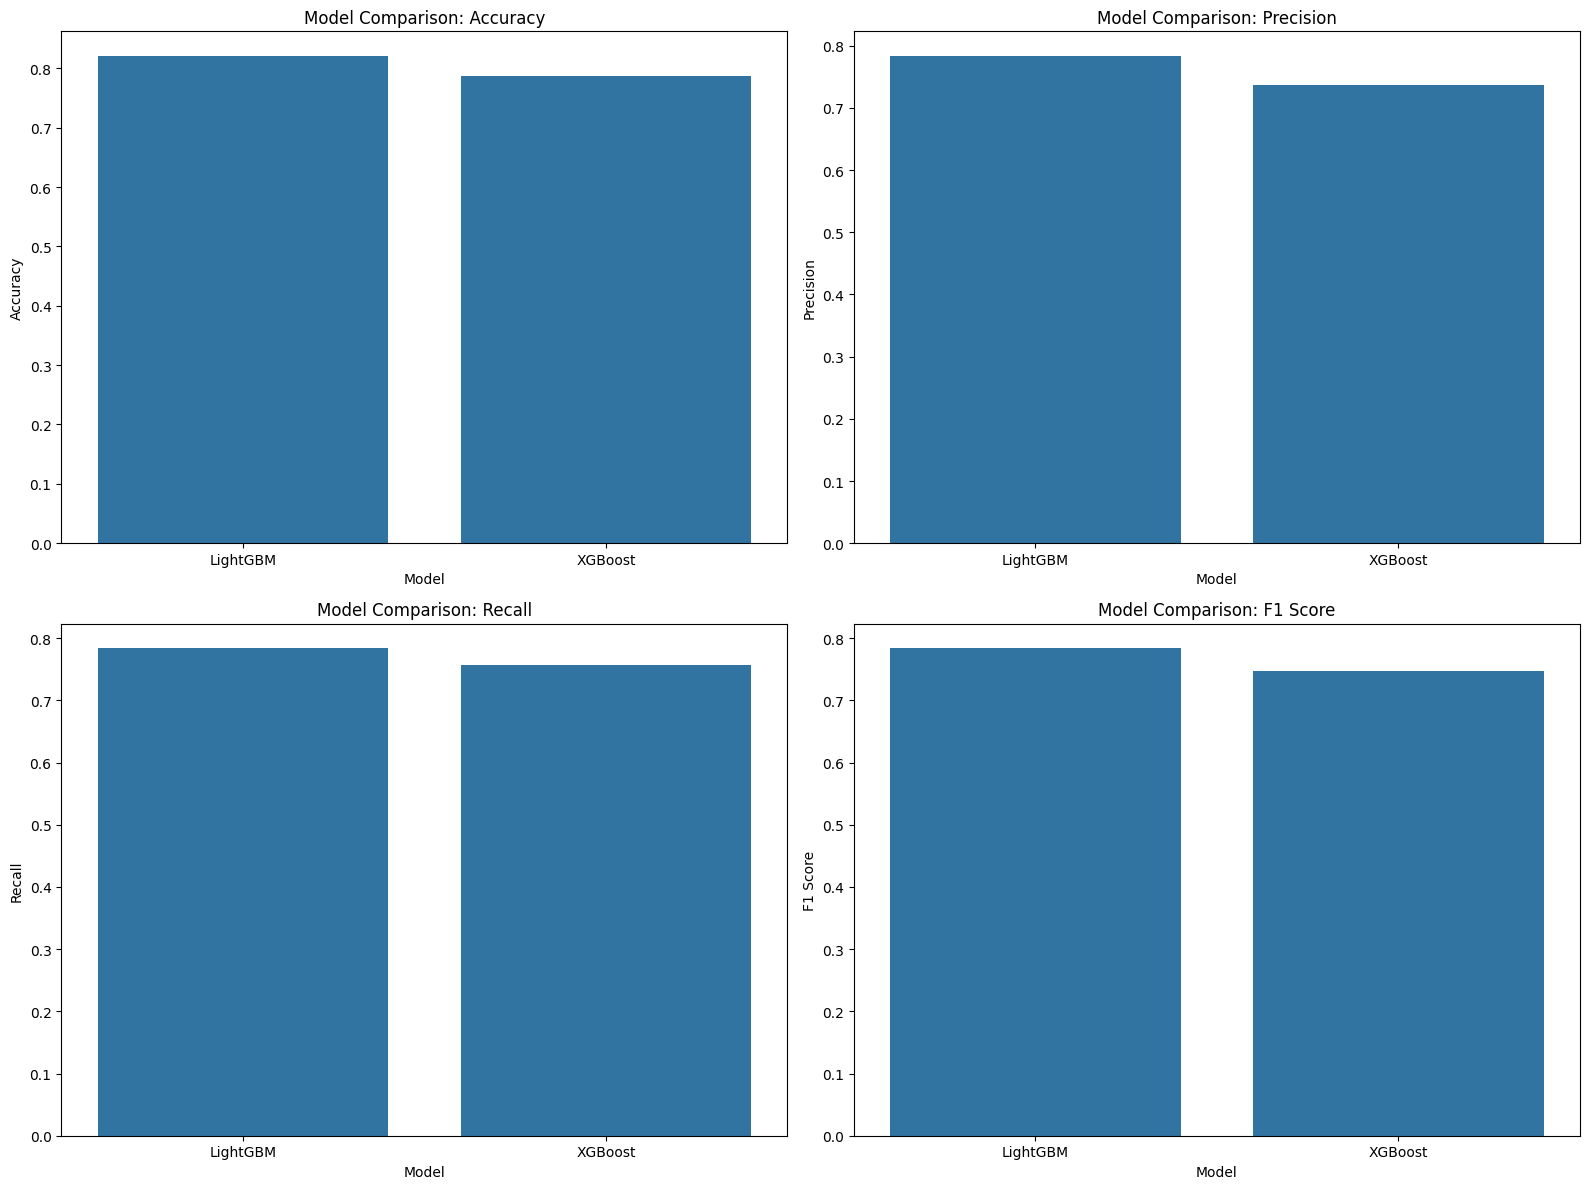

In [47]:
# Plot the evaluation metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot Accuracy
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axs[0, 0])
axs[0, 0].set_title('Model Comparison: Accuracy')

# Plot Precision
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axs[0, 1])
axs[0, 1].set_title('Model Comparison: Precision')

# Plot Recall
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axs[1, 0])
axs[1, 0].set_title('Model Comparison: Recall')

# Plot F1 Score
sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=axs[1, 1])
axs[1, 1].set_title('Model Comparison: F1 Score')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

### Practical Implications
- **LightGBM as the Preferred Model:** Based on these results, **LightGBM** is the superior model for this dataset, performing better in all key metrics. This makes it a more reliable choice for applications where both accuracy and the balance between false positives and false negatives are critical.
  
- **Use Case Considerations:**
  - If the **cost of false positives** is high (e.g., in fraud detection or medical diagnosis), **LightGBM** should be preferred due to its higher precision.
  - If the **cost of false negatives** is high (e.g., missing important positive cases), **LightGBM** also performs slightly better in recall and F1 score, making it a safer choice.

- **Model Stability:** The higher scores across the board suggest LightGBM can consistently deliver better performance for this classification task. However, further fine-tuning of hyperparameters in both models could improve results further.

### Conclusion
LightGBM outperforms XGBoost in this comparative analysis, showing a better balance between accuracy, precision, recall, and F1 score. This makes LightGBM the preferred model for classification tasks where minimizing both false positives and false negatives is crucial.

---
---
####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.